In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# we generated multiple versions of each dataset (same size, dimensions and
# density) but different cells filled and values.
# here we are getting the average.
df_1 = pd.read_csv('results_1681774568.530732.csv')
df_2 = pd.read_csv('results_1681782487.6345549.csv')
df_3 = pd.read_csv('results_1681796439.2619991.csv')
df_4 = pd.read_csv('results_1681783201.7600083.csv')
df_5 = pd.read_csv('results_1681831723.2914822.csv')

concat_df = pd.concat([df_1, df_2, df_3, df_4, df_5])

df = concat_df.groupby(list(concat_df.columns.difference(['time']))).mean().reset_index()

# let's get total cells and also classify datasets based on their ratio
df['total_cells'] = df.num_rows * df.num_cols
df['total_cells'] = pd.to_numeric(df['total_cells'])

def determine_shape(row):
    if row['num_rows'] == row['num_cols']:
        return 'square'
    elif row['num_cols'] > row['num_rows']:
        return 'wide'
    else:
        return 'tall'
    
df['sshape'] = df.apply(determine_shape, axis=1)

In [17]:
# figure params
colors = {'array': '#0c101c', 'linked_list': '#ec4700', 'csr': '#15c2a5', 'default': '#999999'}
linestyles = {0.33: 'dotted', 0.66: 'dashed', 1.0: 'solid'}
alphas = {0.33: 1, 0.66: 0.5, 1.0: 0.5}

# fc_dpi = 300
mm_figsize = (26, 8)
mm_figsize_single = (14, 8)

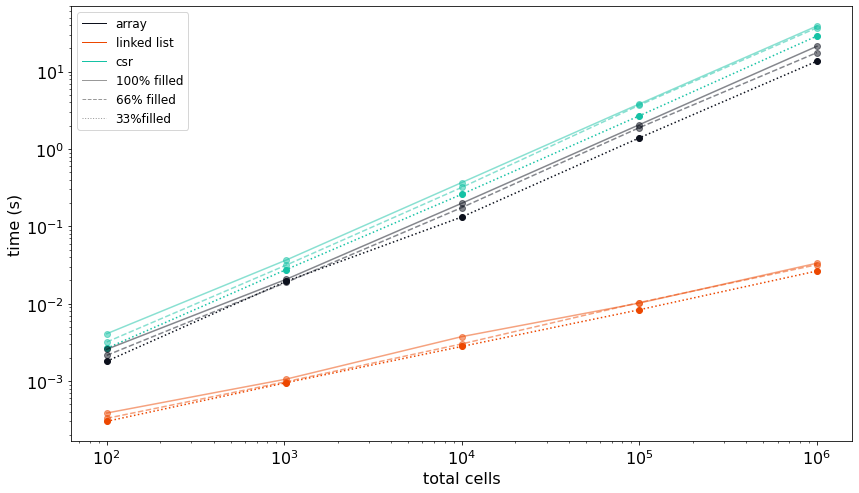

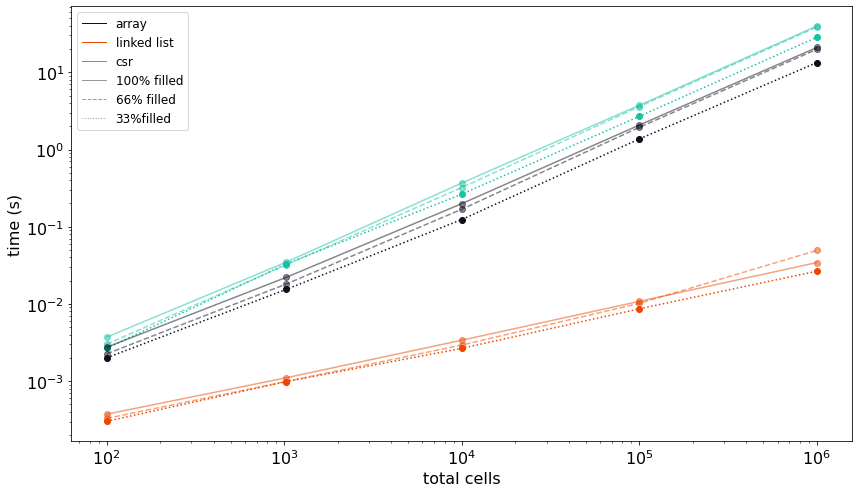

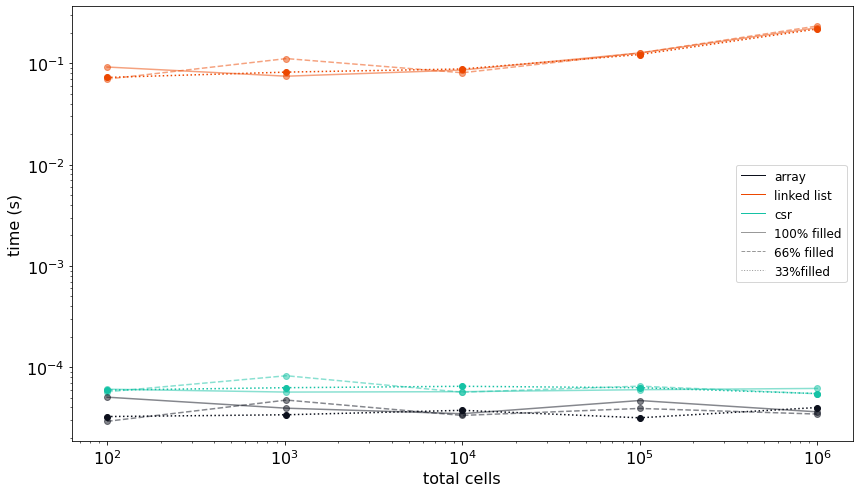

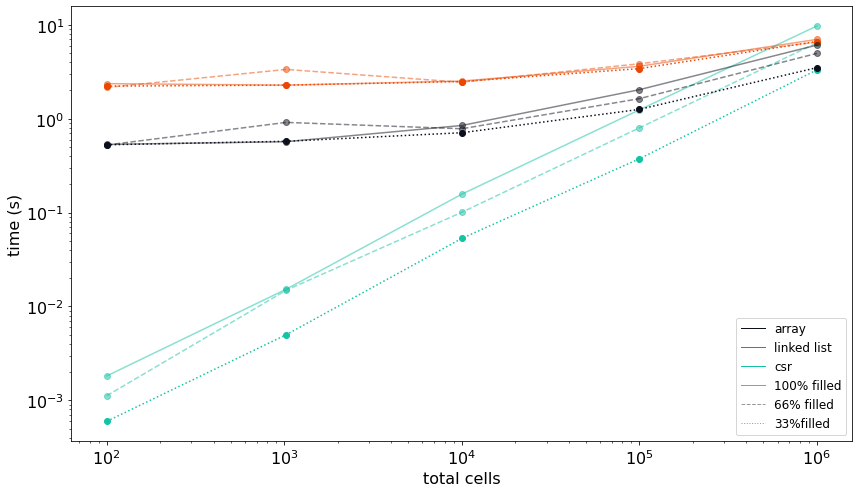

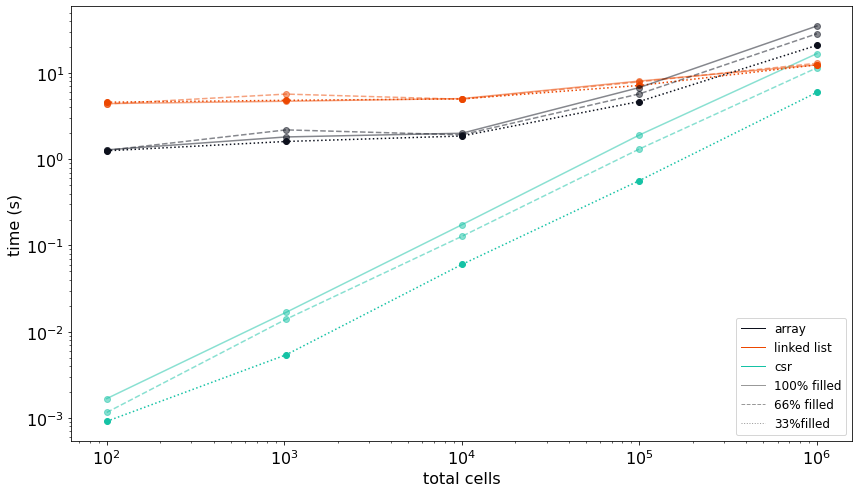

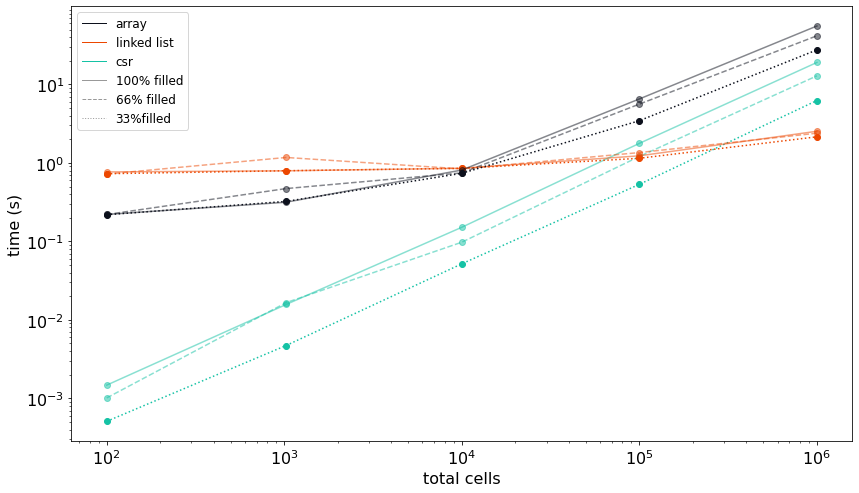

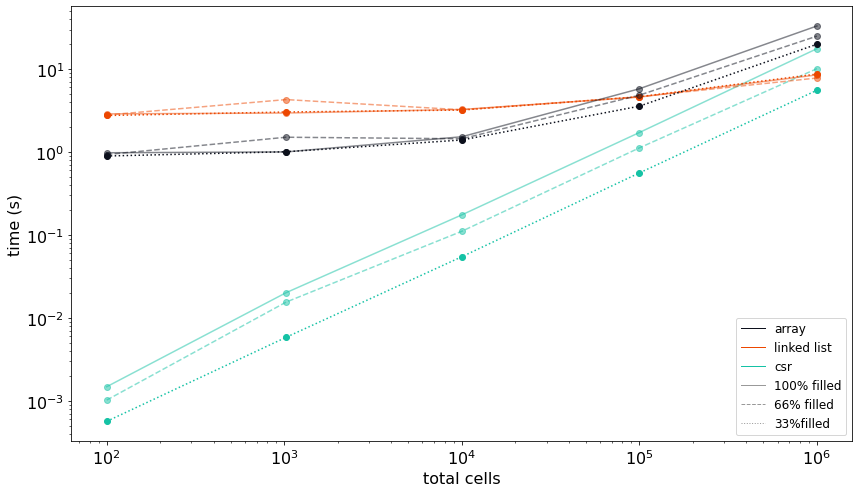

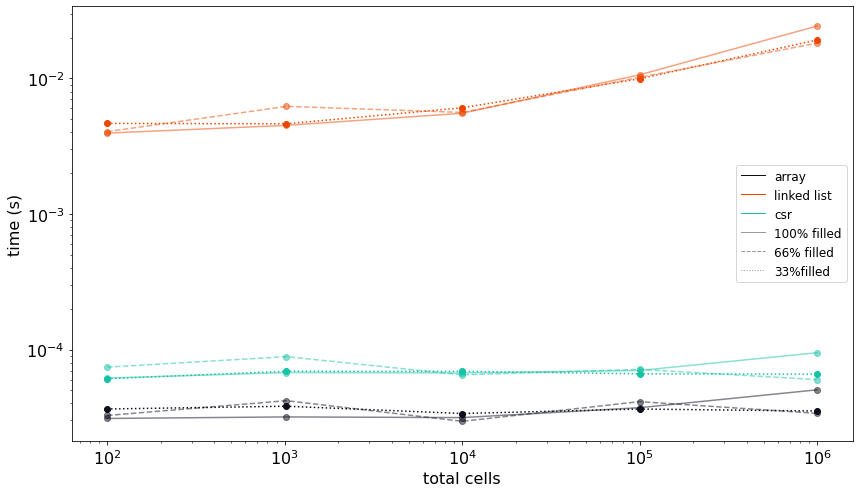

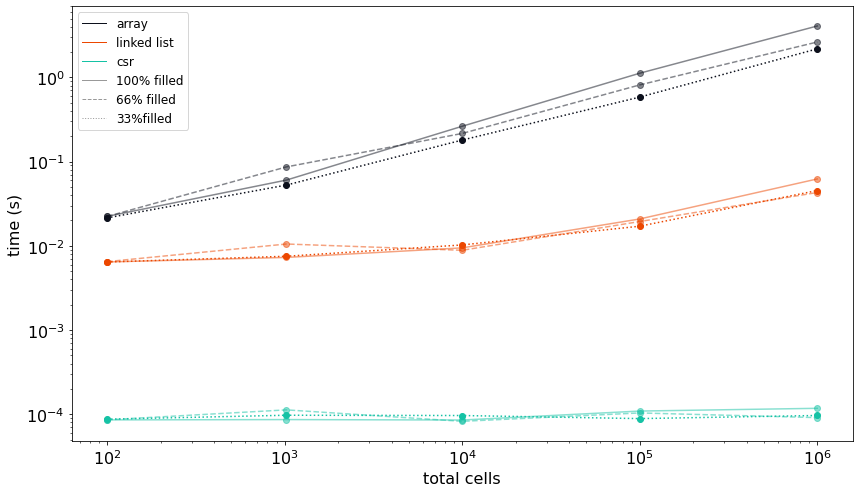

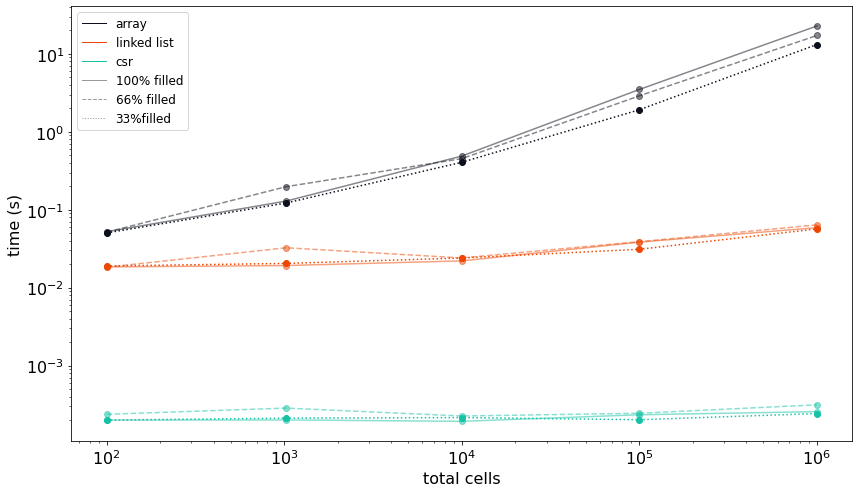

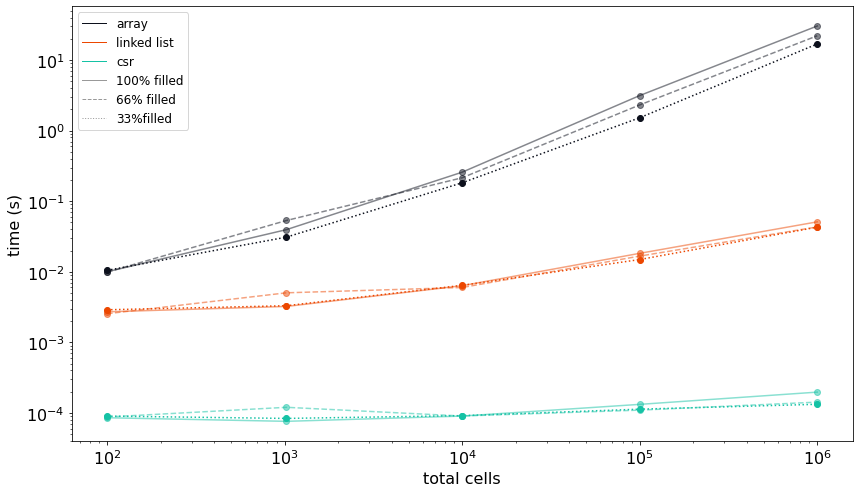

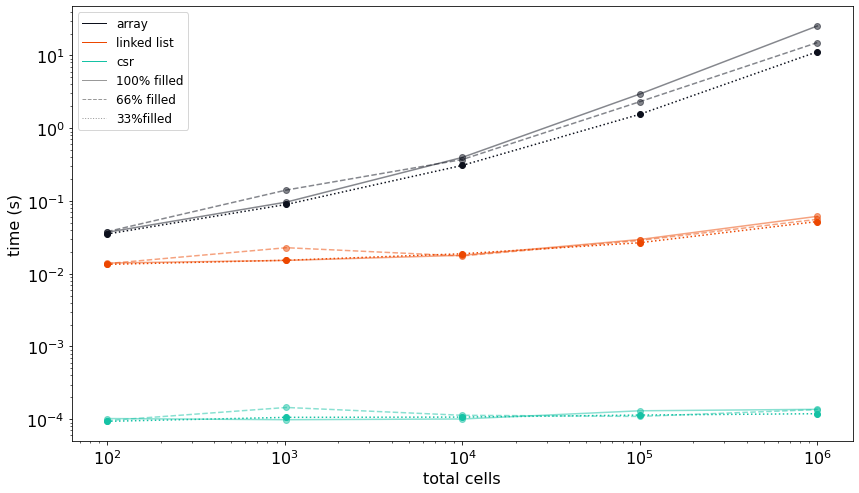

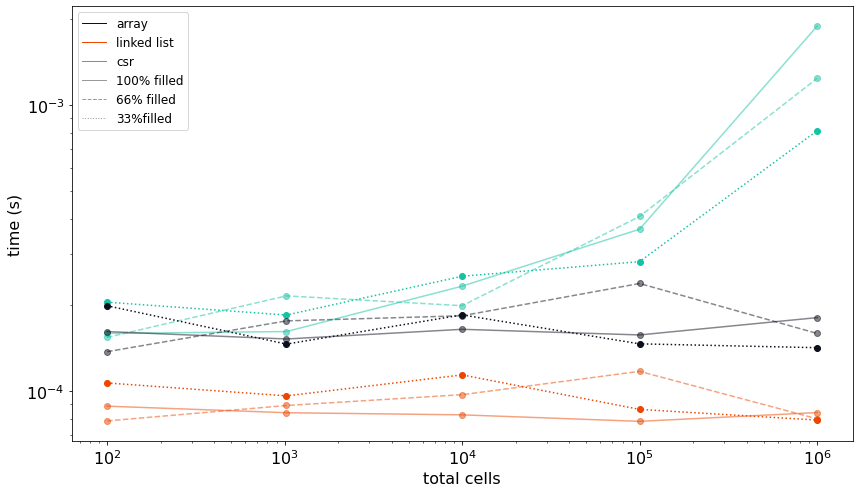

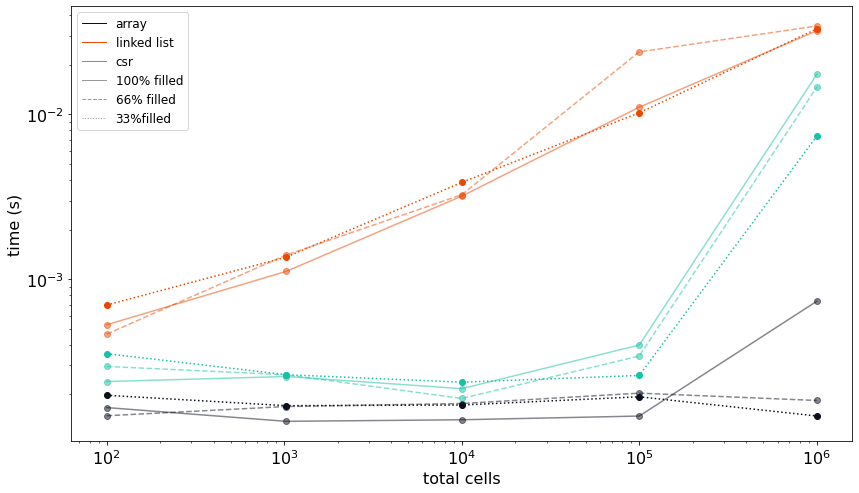

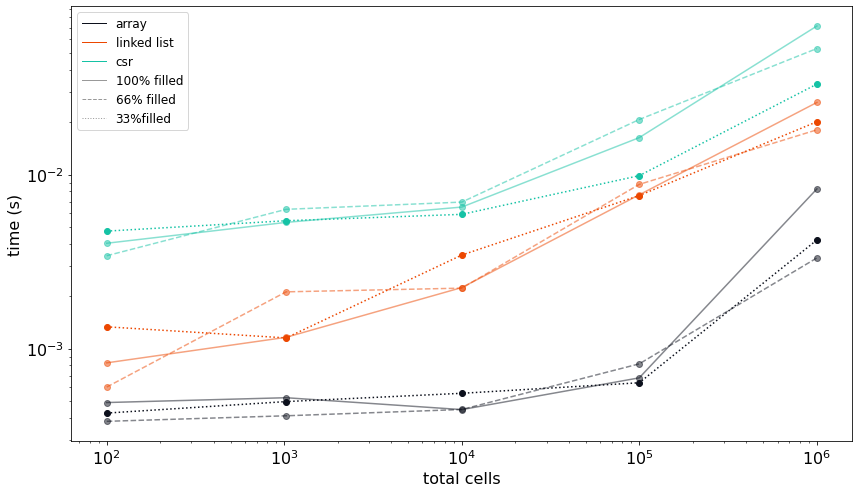

In [23]:
# PRODUCE SQUARE CHART ONLY
operation_names = df.action.unique()        # get list of operations

# op = 'find: existing value'

for op in operation_names:
    op_df = df[df.action == op]
    op_df = op_df.sort_values('total_cells')

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=mm_figsize_single)

    # square
    # --------------------------------------------------------------------------
    shape_df = op_df[op_df.sshape == 'square']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            ax.plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # Set axis labels and legend
    ax.set_xlabel('total cells', fontsize=16)
    ax.set_ylabel('time (s)', fontsize=16)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=16)

    # fig.suptitle(op, fontsize=22)

    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=colors['array'], lw=1),
                    Line2D([0], [0], color=colors['linked_list'], lw=1),
                    Line2D([0], [0], color=colors['csr'], lw=1),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='solid'),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='dashed'),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='dotted')]

    # lines = ax.plot(data)
    ax.legend(custom_lines, ['array', 'linked list', 'csr', '100% filled', '66% filled', '33%filled'], fontsize=12)
        
    op = op.replace(':','')
    plt.savefig(f"graphs/single_{op}.jpg", bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()
    

KeyboardInterrupt: 

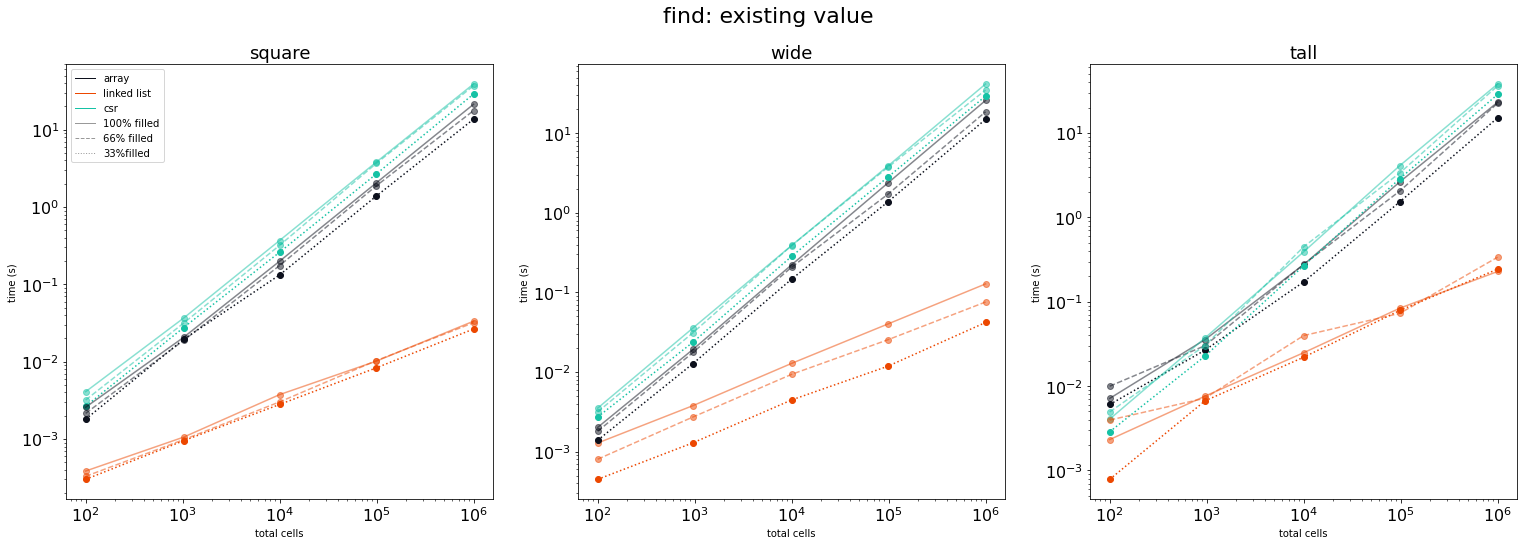

In [24]:
# PRODUCE SQUARE/WIDE/TALL CHARTS
operation_names = df.action.unique()        # get list of operations

for op in operation_names:
    op_df = df[df.action == op]
    op_df = op_df.sort_values('total_cells')

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=mm_figsize)

    # square
    # --------------------------------------------------------------------------
    shape_df = op_df[op_df.sshape == 'square']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[0].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # label_endpoints(axs, 0, shape_df)

    # wide
    # --------------------------------------------------------------------------
    shape_df = op_df[op_df.sshape == 'wide']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[1].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # label_endpoints(axs, 0, shape_df)

    # tall
    # --------------------------------------------------------------------------
    shape_df = op_df[op_df.sshape == 'tall']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[2].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # label_endpoints(axs, 0, shape_df)

    # Set axis labels and legend
    for ax in axs:
        ax.set_xlabel('total cells')
        ax.set_ylabel('time (s)')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=16)

    # set titles
    axs[0].set_title('square', size=18)
    axs[1].set_title('wide', size=18)
    axs[2].set_title('tall', size=18)
    # fig.suptitle(op, fontsize=22)

    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=colors['array'], lw=1),
                    Line2D([0], [0], color=colors['linked_list'], lw=1),
                    Line2D([0], [0], color=colors['csr'], lw=1),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='solid'),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='dashed'),
                    Line2D([0], [0], color=colors['default'], lw=1, linestyle='dotted')]

    # lines = ax.plot(data)
    axs[0].legend(custom_lines, ['array', 'linked list', 'csr', '100% filled', '66% filled', '33%filled'])
        
    op = op.replace(':','')
    plt.savefig(f"graphs/{op}.jpg", bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()
    